#### Implementing the function SeparableGaussianBlurImage (image, sigma) to Gaussian blur an image using separable filters. ”sigma” is the standard deviation of the Gaussian. The separable filter should first Gaussian blur the image horizontally, followed by blurring the image vertically. The final image should look the same as when blurring the image with GaussianBlurImage.

## Question 2  --  SeparableGaussianBlurImage (image, sigma)

In [1]:
from scipy.misc import imread
import scipy as sc
from scipy import ndimage
from skimage import filters
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage.color import rgb2gray
from scipy.misc import imsave



In [4]:
def convolution(oldimage, kernel):
    #image = Image.fromarray(image, 'RGB')
    image_h = oldimage.shape[0]
    image_w = oldimage.shape[1]
    
    
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    
    if(len(oldimage.shape) == 3):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)
    elif(len(oldimage.shape) == 2):
        image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)
    
    
    h = kernel_h // 2
    w = kernel_w // 2
    
    image_conv = np.zeros(image_pad.shape)
    
    for i in range(h, image_pad.shape[0]-h):
        for j in range(w, image_pad.shape[1]-w):
            #sum = 0
            x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
            x = x.flatten()*kernel.flatten()
            
            
#             for m in range(kernel_h):
#                 for n in range(kernel_w):
#                     sum += kernel[m][n] * image_pad[i-h+m][j-w+n]
            
            image_conv[i][j] = x.sum()
    h_end = -h
    w_end = -w
    
    if(h == 0):
        return image_conv[h:,w:w_end]
    if(w == 0):
        return image_conv[h:h_end,w:]

    return image_conv[h:h_end,w:w_end]
    
                    

In [5]:
def SeparableGaussianBlurImage(image, sigma):
    image = imread(image)
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter_Y = np.zeros((filter_size, 1), np.float32)
    gaussian_filter_X = np.zeros((1, filter_size), np.float32)
    m = filter_size//2
    n = filter_size//2
    
    for y in range(-n, n+1):
        x1 = np.sqrt(2*np.pi*(sigma**2))
        x2 = np.exp(-(y**2)/(2* sigma**2))
        gaussian_filter_X[:, y+n] = (1/x1)*x2
    
    for x in range(-m, m):
            x1 = np.sqrt(2*np.pi*(sigma**2))
            x2 = np.exp(-(x**2)/(2* sigma**2))
            gaussian_filter_Y[x+m, :] = (1/x1)*x2
            
    #gaussian_filter = gaussian_filter_X * gaussian_filter_Y
    im_filtered = np.zeros_like(image, dtype=np.float32)
    for c in range(3):
        im_filtered[:, :, c] = convolution(image[:, :, c], gaussian_filter_X)
        
    for c in range(3):
        im_filtered[:, :, c] = convolution(im_filtered[:, :, c], gaussian_filter_Y)
    #print(gaussian_filter.sum())
    #return(plt.imshow(gaussian_filter_Y))
    return (im_filtered.astype(np.uint8))

/Users/ashish/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


CPU times: user 35.3 s, sys: 373 ms, total: 35.7 s
Wall time: 37.9 s


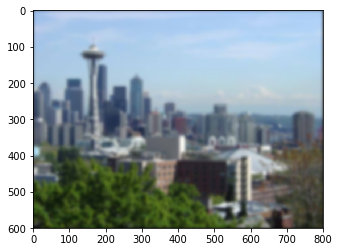

In [6]:
%%time
a = SeparableGaussianBlurImage('hw1_data/Seattle.jpg', 4)
plt.imshow(a)
plt.imsave('2.png', a)